# **Imporitng Necessary Libraries**

In [5]:
import numpy as np
import cv2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random,os,glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [29]:
import tensorflow as tf
tf.version.VERSION

'2.11.0'

# **Loading the Dataset**

In [6]:
dir_path = 'Garbage-Classification/Garbage classification'

In [7]:
#glob module to retrieve all the .jpg files in the subdirectories of the dir_path directory.

img_list = glob.glob(os.path.join(dir_path, '*/*.jpg'))

In [8]:
len(img_list)

2527

In [9]:
# accessing an image file from the dataset classes
image = cv2.imread('Garbage-Classification/Garbage classification/cardboard/cardboard291.jpg')

# **Data Pre-Processing**





In [10]:
print(image.shape)

print(type(image))

print(image.dtype)

print(image)

(384, 512, 3)
<class 'numpy.ndarray'>
uint8
[[[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 77  92 108]
  [ 76  91 107]
  [ 76  91 107]]

 [[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 76  91 107]
  [ 76  91 107]
  [ 75  90 106]]

 [[144 171 198]
  [145 172 199]
  [146 173 200]
  ...
  [ 75  90 106]
  [ 75  90 106]
  [ 74  89 105]]

 ...

 [[ 93 123 152]
  [ 94 124 153]
  [ 94 124 153]
  ...
  [108 142 171]
  [108 142 171]
  [108 142 171]]

 [[ 93 123 150]
  [ 94 124 151]
  [ 96 126 153]
  ...
  [120 151 176]
  [120 151 176]
  [120 151 176]]

 [[ 94 124 151]
  [ 96 126 153]
  [ 98 128 155]
  ...
  [120 151 174]
  [120 151 174]
  [120 151 174]]]


### Edge Detection and Image Gradients

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


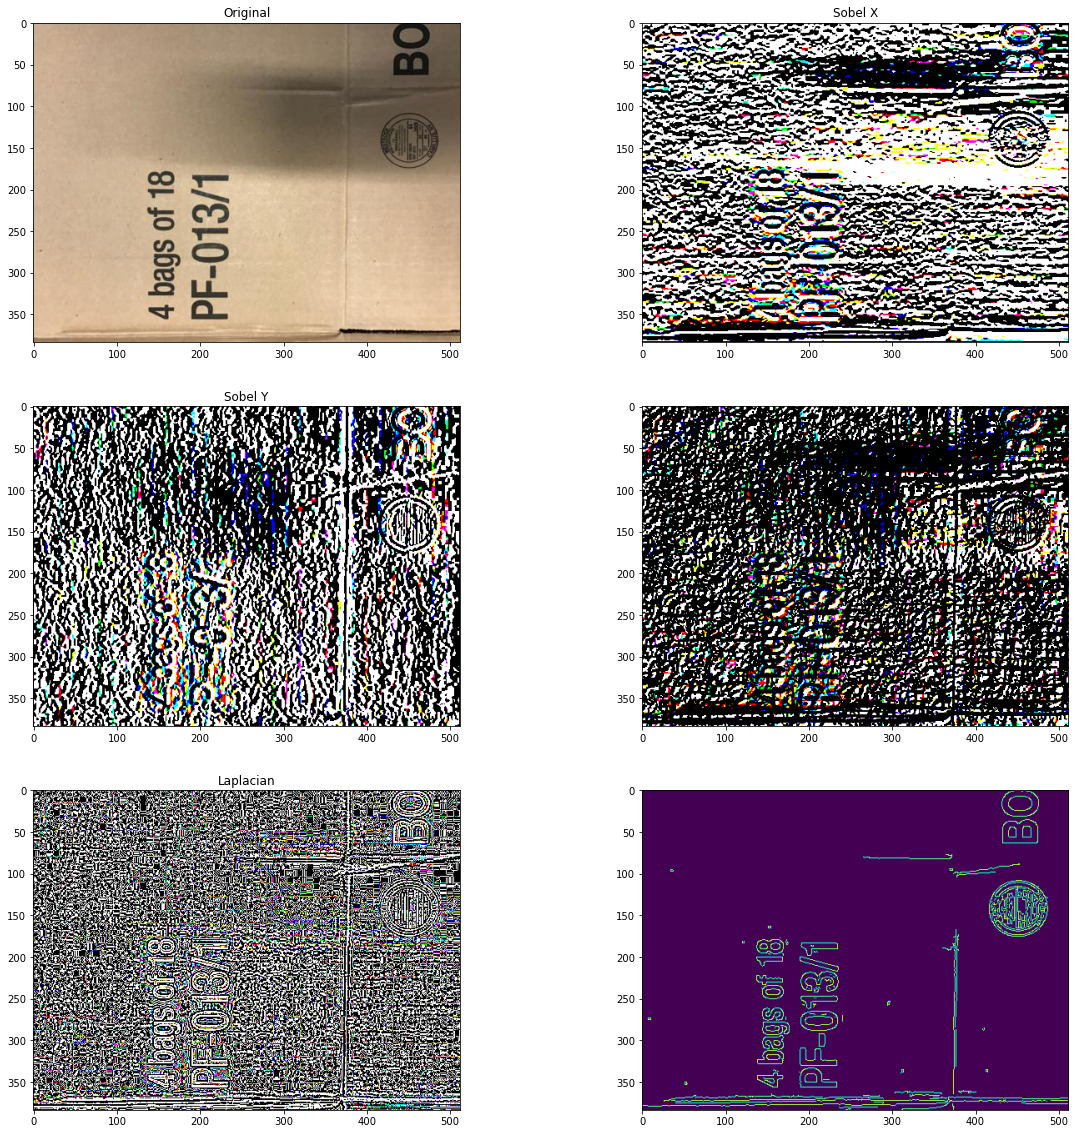

In [11]:
# edge detection using the Sobel operator, which calculates the gradient of the image intensity in the x and y directions.

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hgt, wdt,_ = image.shape

# Sobel Edges

x_sobel = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)
plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(x_sobel)
plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(y_sobel)
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.subplot(3, 2, 4)
plt.imshow(sobel_or)
laplacian = cv2.Laplacian(image, cv2.CV_64F)
plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
plt.subplot(3, 2, 6)
plt.imshow(canny)

## Scaling, Interpolations, And Re-Sizing

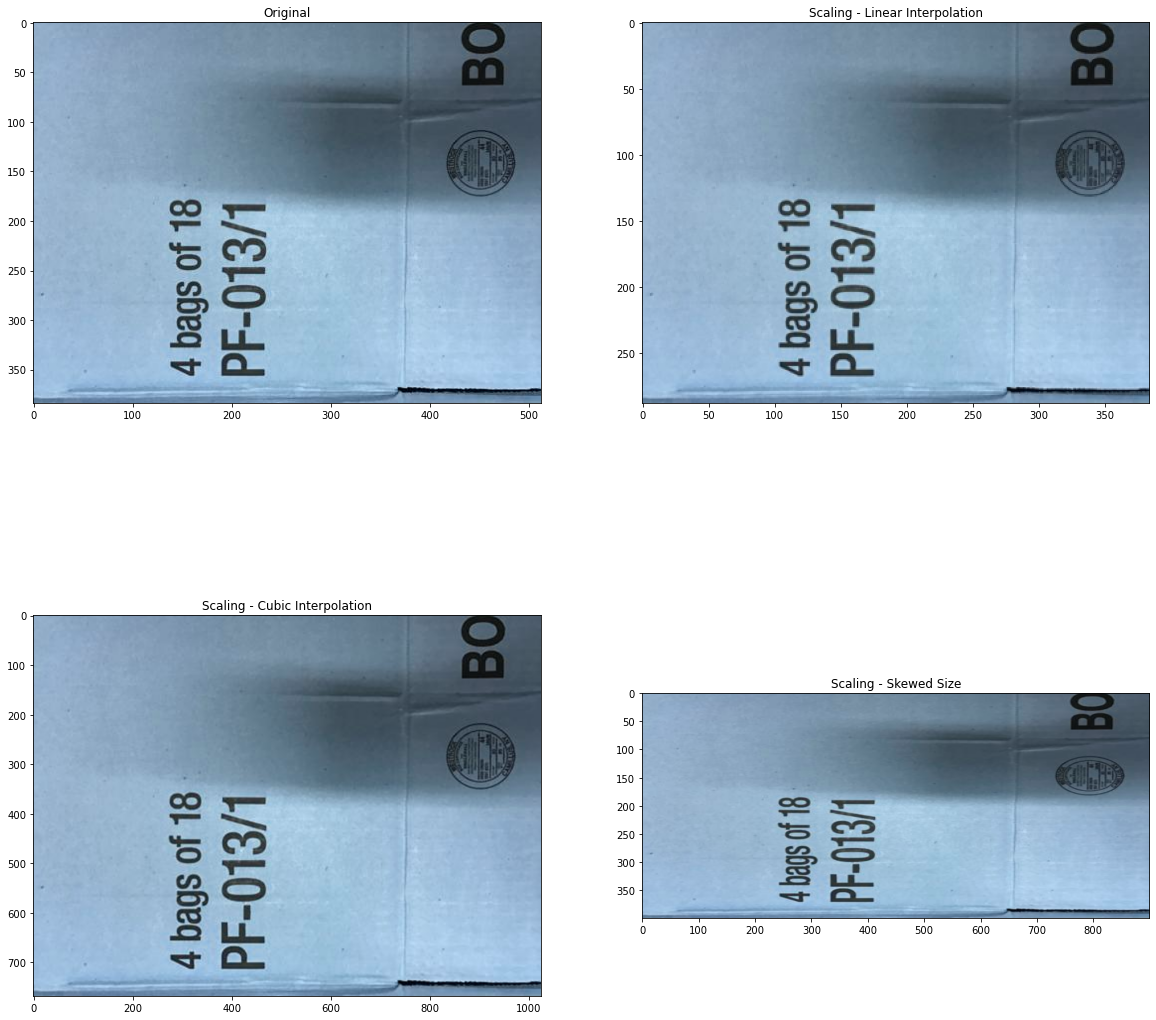

In [12]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
plt.subplot(2, 2, 2)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(2, 2, 3)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)
img_scaled = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
plt.subplot(2, 2, 4)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

# Sharpening

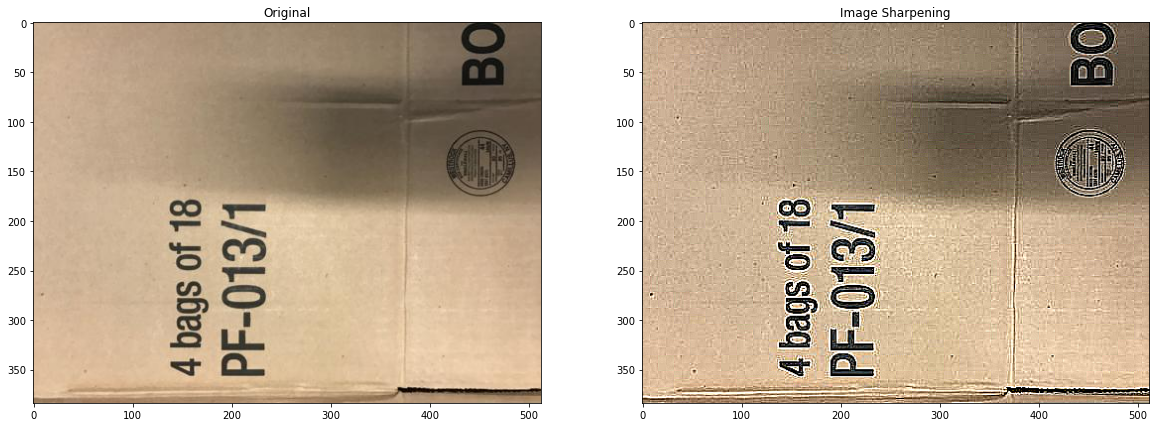

In [13]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

# **Flipping**

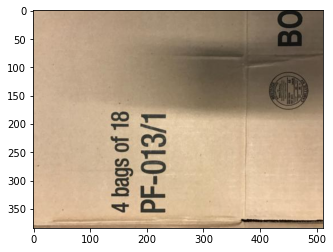

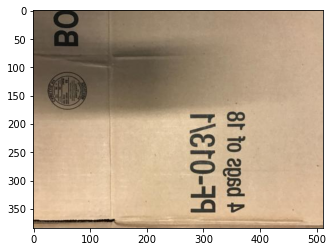

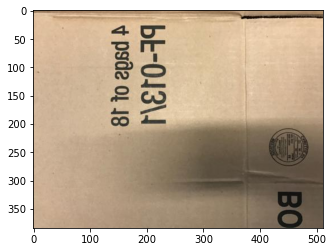

In [14]:
import matplotlib.pyplot as plt

# flip vertically
flipped_vertically = cv2.flip(image, 0)

# flip horizontally
flipped_horizontally = cv2.flip(image, 1)

# display the original and flipped images
plt.imshow(image)
plt.show()

plt.imshow(flipped_horizontally)
plt.show()

plt.imshow(flipped_vertically)
plt.show()


# Model **Building**

In [15]:
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,channel_shift_range=20,rotation_range=30)

test=ImageDataGenerator(rescale=1/255,validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                          class_mode='categorical',subset='training')
test_generator=test.flow_from_directory(dir_path,target_size=(300,300),batch_size=32,
                                        class_mode='categorical',subset='validation')
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [16]:
model=Sequential()

#Adding a convolutional layer with 32 filters of size 3x3, a padding of 'same', and a ReLU activation function.
#Adding a max pooling layer with a pool size of 2x2, which reduces the size of the feature maps by taking the maximum value of each 2x2 block.
model.add(Conv2D(32,(3,3), padding='same',input_shape=(300,300,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(64,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32,(3,3), padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

          
# Classification Layers
          
model.add(Flatten())
          
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
          
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

filepath="trained_model.h5"

checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)

callbacks_list =[checkpoint1]
#earlystop = EarlyStopping(monitor='val_acc', patience=5, verbose=1)
#earlystop = EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='max')
#callbacks_list = [checkpoint1, earlystop]

# Define the early stopping criteria
#earlystop_callback = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
#callbacks_list = [earlystop_callback]

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 32)       0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [19]:
history = model.fit_generator(train_generator, epochs=50, steps_per_epoch=2276//32,validation_data=test_generator,
                    validation_steps=251//32,callbacks=callbacks_list)

C:\Users\amitd\AppData\Local\Temp/ipykernel_4496/3614788373.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs=50, steps_per_epoch=2276//32,validation_data=test_generator,


Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 1.7779 - acc: 0.2077
Epoch 1: val_acc improved from -inf to 0.22768, saving model to trained_model.h5
71/71 [==============================] - 258s 4s/step - loss: 1.7779 - acc: 0.2077 - val_loss: 1.7175 - val_acc: 0.2277
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 1.6865 - acc: 0.2522
Epoch 2: val_acc improved from 0.22768 to 0.28571, saving model to trained_model.h5
71/71 [==============================] - 154s 2s/step - loss: 1.6865 - acc: 0.2522 - val_loss: 1.5859 - val_acc: 0.2857
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 1.6484 - acc: 0.2812
Epoch 3: val_acc improved from 0.28571 to 0.31696, saving model to trained_model.h5
71/71 [==============================] - 155s 2s/step - loss: 1.6484 - acc: 0.2812 - val_loss: 1.6206 - val_acc: 0.3170
Epoch 4/50
71/71 [==============================] - ETA: 0s - loss: 1.5040 - acc: 0.3708
Epoch 4: val_acc improved from 0.31

In [20]:
history

In [21]:
print(history.history['acc'])
print(history.history['val_acc'])

[0.2076648771762848, 0.25222817063331604, 0.2811942994594574, 0.3707664906978607, 0.3970588147640228, 0.4122103452682495, 0.4273618459701538, 0.4322638213634491, 0.47058823704719543, 0.4688057005405426, 0.4839572310447693, 0.4777183532714844, 0.4995543658733368, 0.5040106773376465, 0.5258467197418213, 0.5338680744171143, 0.5285205245018005, 0.5378788113594055, 0.5539215803146362, 0.5454545617103577, 0.5753119587898254, 0.5681818127632141, 0.5677362084388733, 0.573083758354187, 0.5770944952964783, 0.5877896547317505, 0.6016042828559875, 0.5913547277450562, 0.583778977394104, 0.6029411554336548, 0.6154189109802246, 0.6038324236869812, 0.6185383200645447, 0.6372548937797546, 0.6403743028640747, 0.6577540040016174, 0.6470588445663452, 0.6483957171440125, 0.6501782536506653, 0.6590909361839294, 0.648841381072998, 0.6528520584106445, 0.658199667930603, 0.6608734130859375, 0.6688948273658752, 0.6791443824768066, 0.6724599003791809, 0.6911764740943909, 0.689393937587738, 0.7032085657119751]
[0

Text(0.5, 1.0, 'Training and Validation Accuracy')

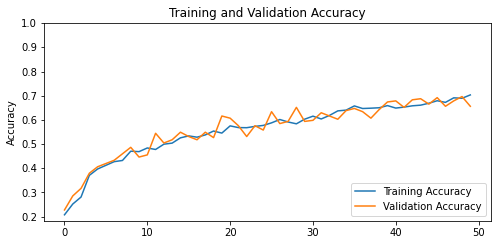

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

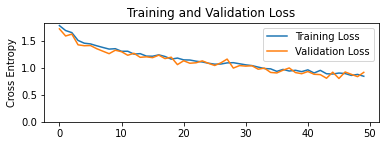

In [23]:
# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# from keras.models import load_model
# import numpy as np
# from keras.preprocessing import image
# import tensorflow as tf
# from tensorflow.keras.utils import load_img,img_to_array
# import keras.utils as image


# # Load the trained model
# model = load_model('trained_model.h5')

# # Load the test image
# test_image = image.load_img('/content/drive/MyDrive/Garbage  Detection Dataset/Garbage-Classification/Garbage classification/Garbage classification/cardboard/cardboard101.jpg', target_size=(300, 300))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis=0)

# # Make a prediction on the test image
# result = model.predict(test_image)

# # Print the predicted class
# print(result)


1/1 [==============================] - 0s 129ms/step
[[1. 0. 0. 0. 0. 0.]]


1/1 [==============================] - 0s 254ms/step
Probability: 0.8228063
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

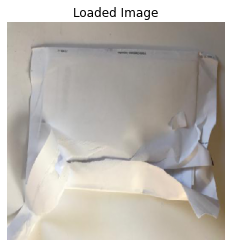

In [24]:
# from keras.preprocessing import image
import keras.utils as ku
import numpy as np
test_img = 'Garbage-Classification/Garbage classification/paper/paper134.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

1/1 [==============================] - 0s 106ms/step
Probability: 0.77641773
Classified: paper 



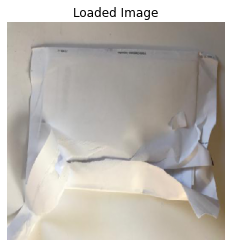

In [25]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import keras.utils as ku
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('trained_model.h5')

# Define the class labels
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Load a test image
test_img = 'Garbage-Classification/Garbage classification/paper/paper134.jpg'
img = ku.load_img(test_img, target_size=(300, 300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0

# Make a prediction on the test image
prediction = model.predict(img[np.newaxis, ...])
predicted_class_idx = np.argmax(prediction[0])
predicted_class = labels[predicted_class_idx]

# Print the predicted class and probability
print("Probability:", np.max(prediction[0]))
print("Classified:", predicted_class, '\n')

# Display the test image
plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")
plt.show()